Name - Piyush Shivnani
Project - Heart_Disease_Prediction_using_ML

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [2]:
df.shape

(270, 14)

In [3]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

Age:			age
Sex:			1: male, 0: female
Chest pain type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
BP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FBS over 120:			fasting blood sugar > 120 mg/dl
EKG results:			resting electrocardiographic results (values 0,1,2)
Max HR:			 maximum heart rate achieved
Exercise angina:			exercise induced angina
ST depression:			oldpeak = ST depression induced by exercise relative to rest
Slope of ST:			the slope of the peak exercise ST segment
Number of vessels fluro:			number of major vessels (0-3) colored by flourosopy
Thallium:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [7]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

0    150
1    120
Name: Heart Disease, dtype: int64


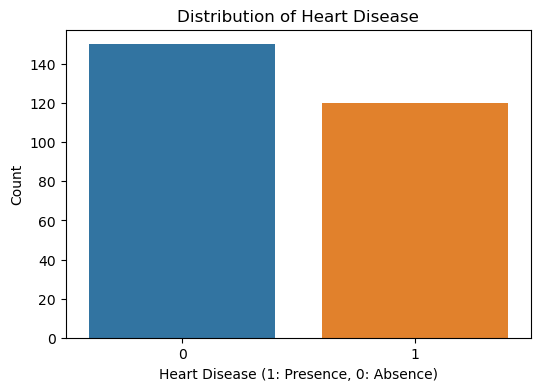

In [9]:
plt.figure(figsize=(6, 4))
heart_disease_count = df['Heart Disease'].value_counts()
print(heart_disease_count)
sns.barplot(x=heart_disease_count.index, y=heart_disease_count.values)
plt.xlabel('Heart Disease (1: Presence, 0: Absence)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.show()

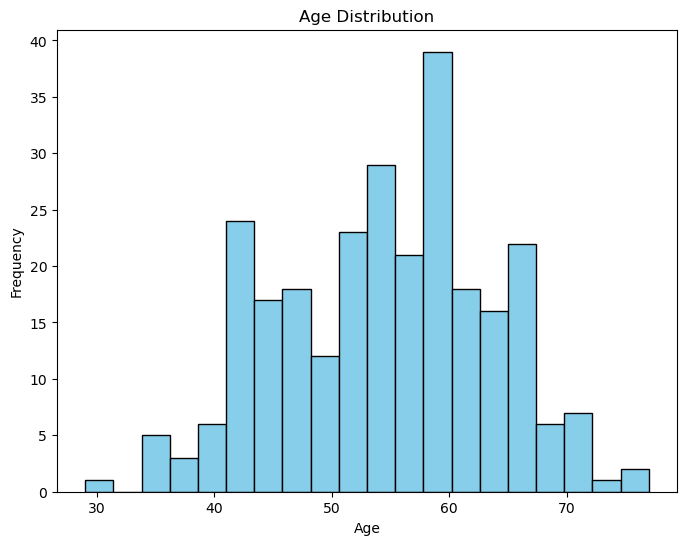

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

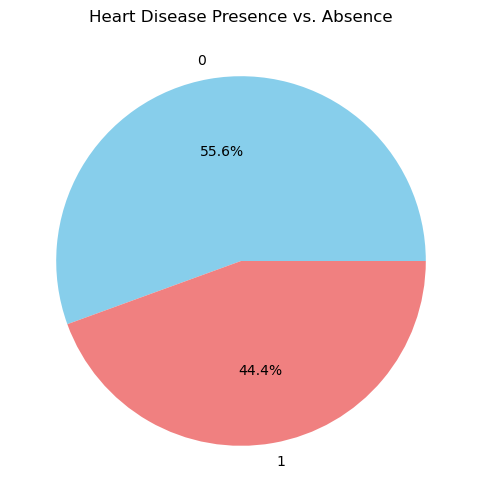

In [11]:
class_counts = df['Heart Disease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Heart Disease Presence vs. Absence')
plt.show()

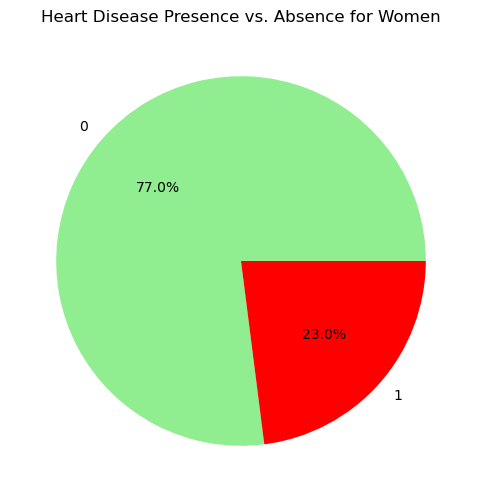

In [12]:
women_data = df[df['Sex'] == 0]  
women_class_counts = women_data['Heart Disease'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(women_class_counts, labels=women_class_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Heart Disease Presence vs. Absence for Women')
plt.show()

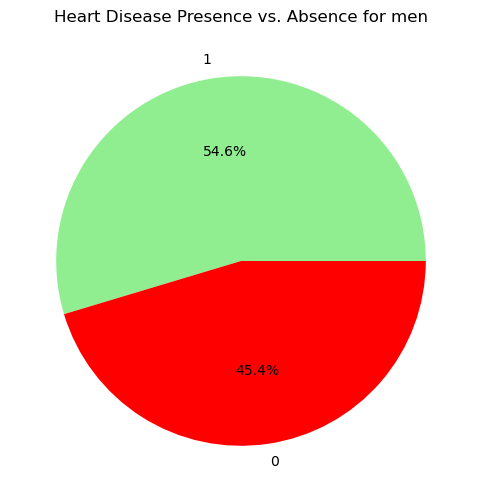

In [13]:
men_data = df[df['Sex'] == 1]
men_class_counts = men_data['Heart Disease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(men_class_counts, labels=men_class_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Heart Disease Presence vs. Absence for men')
plt.show()

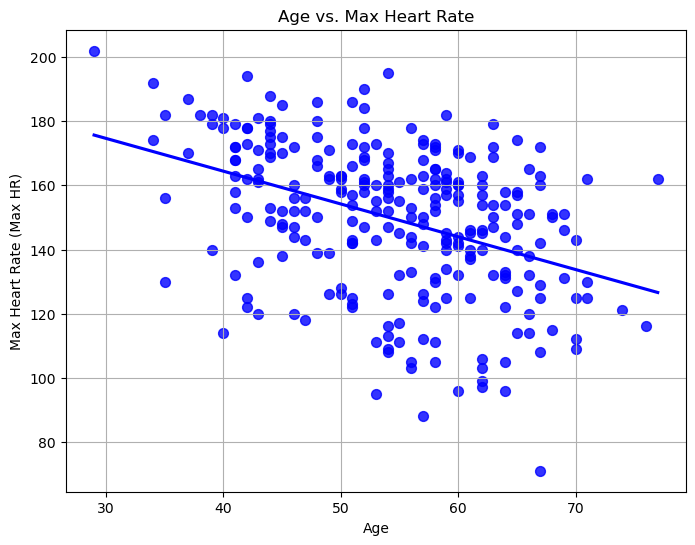

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Max HR', data=df, scatter_kws={'s': 50}, color='b', ci=None)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (Max HR)')
plt.title('Age vs. Max Heart Rate')
plt.grid(True)
plt.show()

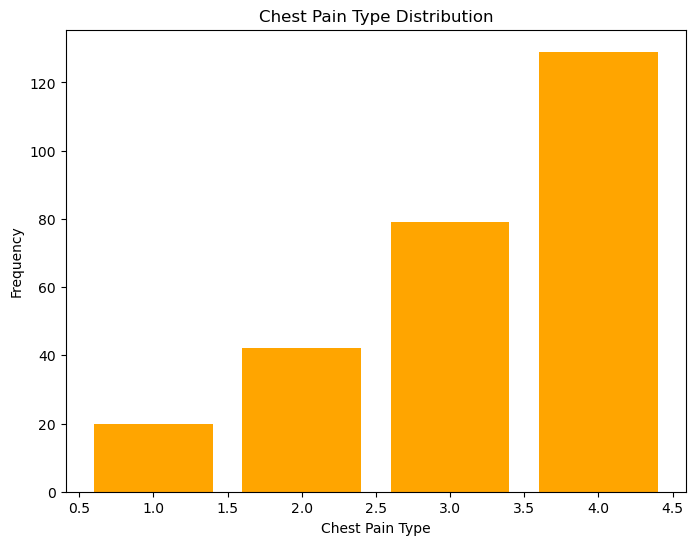

In [15]:
plt.figure(figsize=(8, 6))
chest_pain_counts = df['Chest pain type'].value_counts()
plt.bar(chest_pain_counts.index, chest_pain_counts.values, color='orange')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Chest Pain Type Distribution')
plt.show()

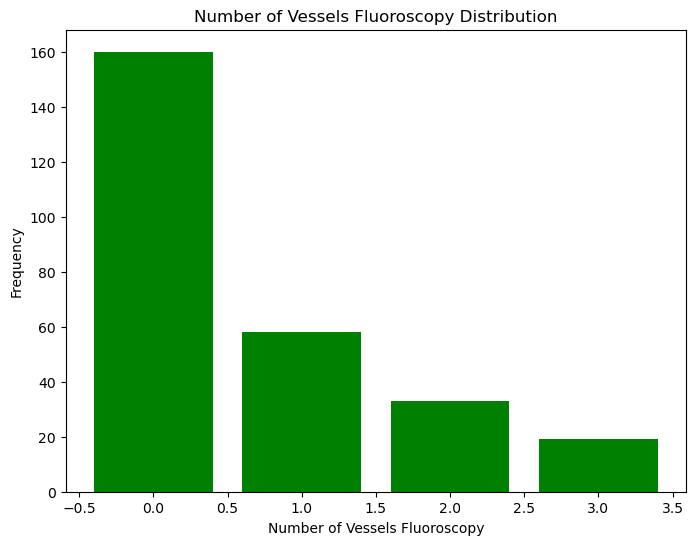

In [16]:
plt.figure(figsize=(8, 6))
vessels_fluoro_counts = df['Number of vessels fluro'].value_counts()
plt.bar(vessels_fluoro_counts.index, vessels_fluoro_counts.values, color='green')
plt.xlabel('Number of Vessels Fluoroscopy')
plt.ylabel('Frequency')
plt.title('Number of Vessels Fluoroscopy Distribution')
plt.show()

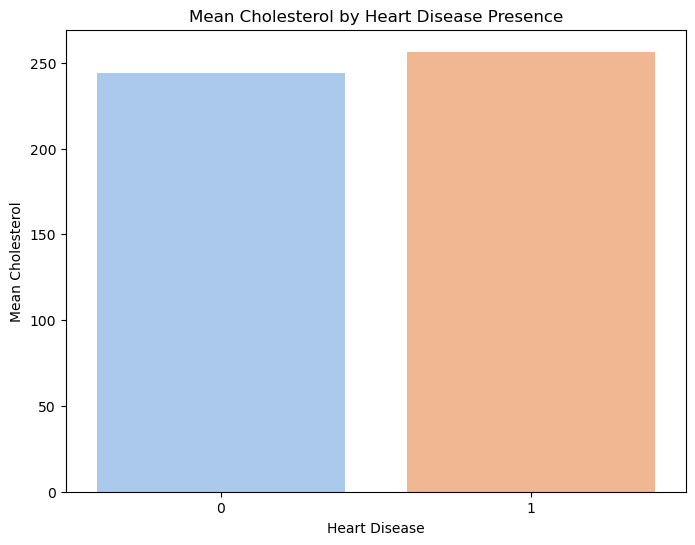

In [17]:
plt.figure(figsize=(8, 6))
mean_chol_by_heart_disease = df.groupby('Heart Disease')['Cholesterol'].mean()
sns.barplot(x=mean_chol_by_heart_disease.index, y=mean_chol_by_heart_disease.values, palette='pastel')
plt.xlabel('Heart Disease')
plt.ylabel('Mean Cholesterol')
plt.title('Mean Cholesterol by Heart Disease Presence')
plt.show()

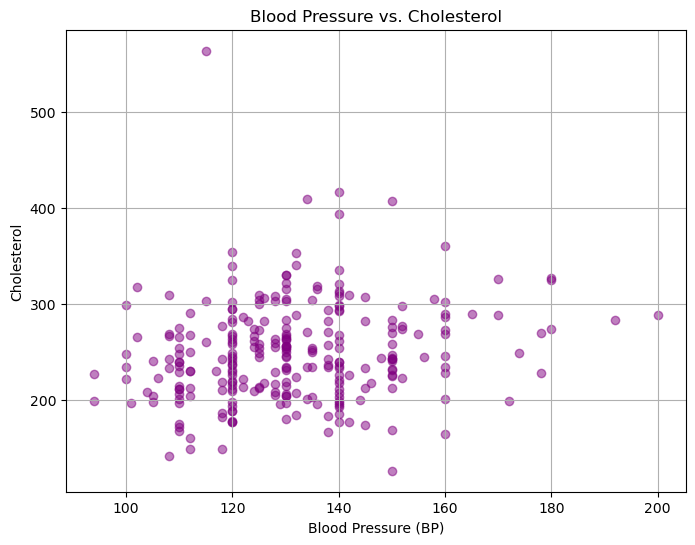

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BP'], df['Cholesterol'], color='purple', alpha=0.5)
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Cholesterol')
plt.title('Blood Pressure vs. Cholesterol')
plt.grid(True)
plt.show()

In [19]:
print(df.corr()["Heart Disease"].abs().sort_values(ascending=False))

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Heart Disease, dtype: float64


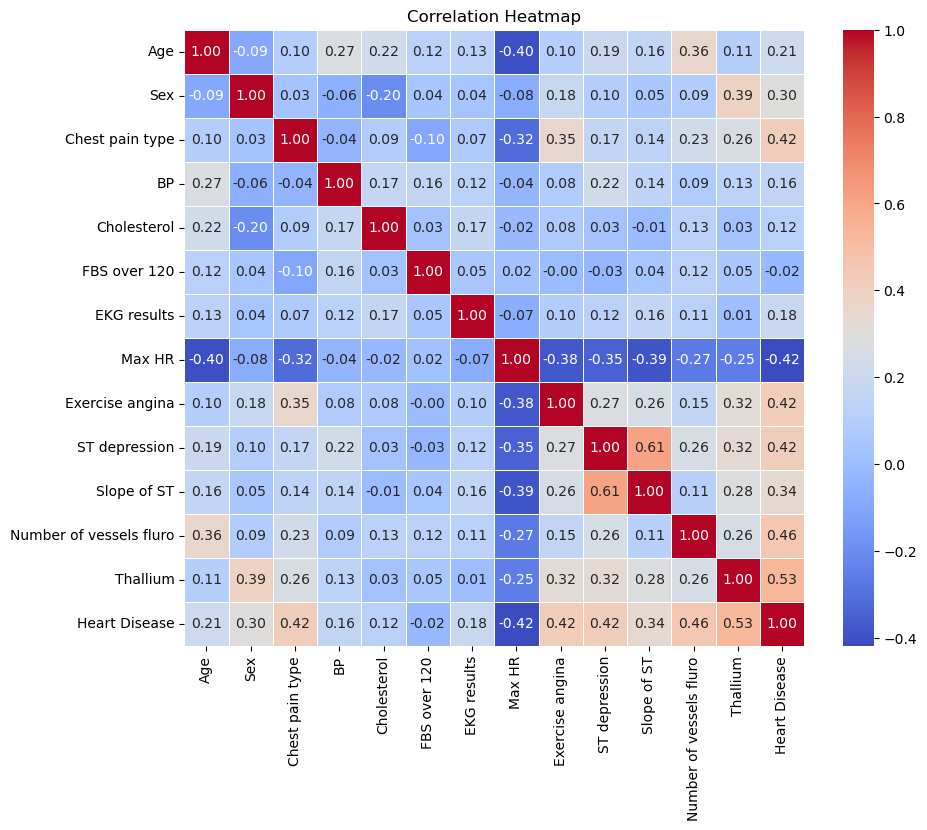

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

KNN Accuracy: 0.8148148148148148
Logistic Regression Accuracy: 0.9074074074074074
Decision Tree Accuracy: 0.6851851851851852
Random Forest Accuracy: 0.8518518518518519
Neural Network Accuracy: 0.8148148148148148
The best model is Logistic Regression with an accuracy of 0.9074074074074074.


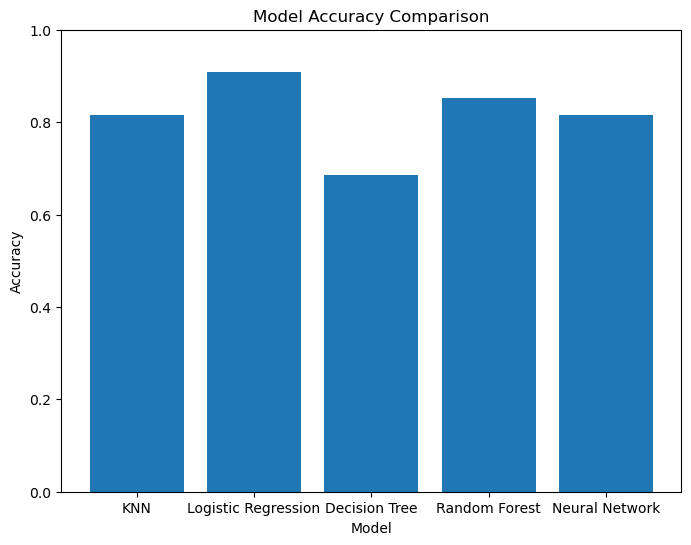

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = [
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]
best_model_name = ""
best_accuracy = 0.0
model_names = []
accuracies = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
print(f"The best model is {best_model_name} with an accuracy of {best_accuracy}.")
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')
new_data = []
print("\nEnter the values for the following features:")
for feature in X.columns:
    value = float(input(f"{feature}: "))
    new_data.append(value)
new_data_scaled = scaler.transform([new_data])
best_model = dict(models)[best_model_name]  
prediction = best_model.predict(new_data_scaled)
print(f"\nBased on the input data, the prediction for heart disease is: {prediction[0]}")
if prediction[0] == 1:
    print("\nThe prediction indicates that the person may have heart disease.")
else:
    print("\nThe prediction indicates that the person is unlikely to have heart disease.")


Enter the values for the following features:
Age: 55
Sex: 0
Chest pain type: 3
BP: 140
Cholesterol: 250
FBS over 120: 1
EKG results: 1
Max HR: 170
Exercise angina: 1
ST depression: 2
Slope of ST: 1
Number of vessels fluro: 3
Thallium: 7

Based on the input data, the prediction for heart disease is: 1

The prediction indicates that the person may have heart disease.
